# **A Comprehensive Survey of Machine Learning Methods for Text Classification**
## ML Models: SMS Spam Dataset

#### *Carlos Santiago Bañón, Moazam Soomro*
#### *CAP 6307, Fall '21*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import time
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## **Loading the Dataset**

---



In [2]:
# Choose the dataset files.
train_file = "./spam_train.csv"
test_file = "./spam_test.csv"

In [3]:
# Load the training data.
train = pd.read_csv(train_file)
train.head()

,text,label
0,'m boat still mom check yo 'm half naked,0
1,bank granite issue strong-buy explosive pick m...,1
2,r giving second chance rahul dengra,0
3,played smash bros lt gt religiously,0
4,private 2003 account statement 07973788240 sho...,1


In [4]:
# Load the testing data.
test = pd.read_csv(test_file)
test.head()

,text,label
0,funny fact nobody teach volcano 2 erupt tsunam...,0
1,sent score sophas secondary application school...,0
2,know someone know fancy call 09058097218 find ...,1
3,promise getting soon 'll text morning let know...,0
4,congratulation ur awarded either å£500 cd gift...,1


In [5]:
# Show the sizes.
print("Training Set:", train.shape)
print("Test Set:", test.shape)

Training Set: (4457, 2)
Test Set: (1115, 2)


In [6]:
# Separate the text and labels.
X_train = train.text.astype('U')
Y_train = train.label
X_test = test.text.astype('U')
Y_test = test.label

## **Training the Models**

---



In [7]:
# Initialize the metric lists.
acc_list = []
p_list = []
r_list = []
f1_list = []
cm_list = []
time_train_list = []
time_pred_list = []

# Initialize the best result lists.
y_pred_list = []
best_pred_list = []
classifiers = ['LSTM', 'Logistic Regression', 'Support Vector\nMachine', 'Random Forest', 'Decision Tree', 'AdaBoost', 'k-Nearest Neighbors', 'Multinomial\nNaïve Bayes', 'All', 'Top 3']
best_classifiers = []

In [8]:
# Append the results from the LSTM.
acc_list.append(0.98)
p_list.append(0.98)
r_list.append(0.945)
f1_list.append(0.960)
cm_list.append([[962, 3], [16, 134]])
time_train_list.append(6.8)

### **Logistic Regression**

In [9]:
# Set up the classifier.
clf_logistic = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', LogisticRegression(max_iter=2000, random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_logistic.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.11789417266845703


In [10]:
# Predict from the test set and save the results.
print("Predicting...")
t2 = time.time()
y_pred = clf_logistic.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Num. Iterations:", clf_logistic['classifier'].n_iter_[0])
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.016196727752685547


Evaluating...
Num. Iterations: 32
Accuracy: 0.97847533632287
Precision: 0.84
Recall: 1.0
F1 Score: 0.9130434782608696
Confusion Matrix: [[965  24]
 [  0 126]]


In [11]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Support Vector Machine**

In [12]:
# Set up the classifier.
clf_svm = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', LinearSVC(max_iter=5000, random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_svm.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.09831786155700684


In [13]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_svm.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Num. Iterations:", clf_svm['classifier'].n_iter_)
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.013748645782470703


Evaluating...
Num. Iterations: 325
Accuracy: 0.9802690582959641
Precision: 0.86
Recall: 0.9923076923076923
F1 Score: 0.9214285714285715
Confusion Matrix: [[964  21]
 [  1 129]]


In [14]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Random Forest**

In [15]:
# Set up the classifier.
clf_forest = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', RandomForestClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_forest.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.9603204727172852


In [16]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_forest.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.0705409049987793


Evaluating...
Accuracy: 0.9775784753363229
Precision: 0.8333333333333334
Recall: 1.0
F1 Score: 0.9090909090909091
Confusion Matrix: [[965  25]
 [  0 125]]


In [17]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Decision Tree**

In [18]:
# Set up the classifier.
clf_tree = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', DecisionTreeClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_tree.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.17173314094543457


In [19]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_tree.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.020740747451782227


Evaluating...
Accuracy: 0.9730941704035875
Precision: 0.8466666666666667
Recall: 0.9477611940298507
F1 Score: 0.8943661971830985
Confusion Matrix: [[958  23]
 [  7 127]]


In [20]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **AdaBoost**

In [21]:
# Set up the classifier.
clf_adaboost = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', AdaBoostClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_adaboost.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.3680229187011719


In [22]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_adaboost.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.039951324462890625


Evaluating...
Accuracy: 0.97847533632287
Precision: 0.8466666666666667
Recall: 0.9921875
F1 Score: 0.9136690647482014
Confusion Matrix: [[964  23]
 [  1 127]]


In [23]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### ***k*-Nearest Neighbors**

In [24]:
# Set up the classifier.
clf_knn = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', KNeighborsClassifier())
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_knn.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.06270098686218262


In [25]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_knn.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.1607203483581543


Evaluating...
Accuracy: 0.9174887892376682
Precision: 0.38666666666666666
Recall: 1.0
F1 Score: 0.5576923076923077
Confusion Matrix: [[965  92]
 [  0  58]]


In [26]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Multinomial Naïve Bayes**

In [27]:
# Set up the classifier.
clf_mnb = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', MultinomialNB())
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_mnb.fit(X_train.to_numpy(), Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 0.08011960983276367


In [28]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_mnb.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 0.02136683464050293


Evaluating...
Accuracy: 0.9802690582959641
Precision: 0.9
Recall: 0.9507042253521126
F1 Score: 0.9246575342465754
Confusion Matrix: [[958  15]
 [  7 135]]


In [29]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

## **Classifier Ensembles**
---

### **Ensemble #1: Majority Vote from All Classifiers**

In [30]:
num_samples = len(X_test)
num_clf = len(y_pred_list)
total_votes = []

for i in range(num_samples):

  pred = 0

  for y_pred in y_pred_list:
    pred += y_pred[i]

  pred = pred / num_clf

  # Take the majority vote.
  if pred > 0.5:
    pred = 1
  else:
    pred = 0

  total_votes.append(pred)

print("Votes:", total_votes)

Votes: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [31]:
# Evaluate the ensemble.
print("Evaluating ensemble...")
print("Accuracy:", accuracy_score(total_votes, Y_test))
print("Precision:", precision_score(total_votes, Y_test))
print("Recall:", recall_score(total_votes, Y_test))
print("F1 Score:", f1_score(total_votes, Y_test))
print("Confusion Matrix:", confusion_matrix(total_votes, Y_test))

Evaluating ensemble...
Accuracy: 0.979372197309417
Precision: 0.8466666666666667
Recall: 1.0
F1 Score: 0.9169675090252708
Confusion Matrix: [[965  23]
 [  0 127]]


In [32]:
# Save the metrics.
acc_list.append(accuracy_score(total_votes, Y_test))
p_list.append(precision_score(total_votes, Y_test))
r_list.append(recall_score(total_votes, Y_test))
f1_list.append(f1_score(total_votes, Y_test))
cm_list.append(confusion_matrix(total_votes, Y_test))

### **Ensemble #2: Majority Vote from the Top 3 Classifiers**

In [33]:
num_samples = len(X_test)
num_clf = len(best_pred_list)
total_votes = []

for i in range(num_samples):

  pred = 0

  for y_pred in best_pred_list:
    pred += y_pred[i]

  pred = pred / num_clf

  # Take the majority vote.
  if pred > 0.5:
    pred = 1
  else:
    pred = 0

  total_votes.append(pred)

print(total_votes)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [34]:
# Evaluate the ensemble.
print("Evaluating ensemble...")
print("Accuracy:", accuracy_score(total_votes, Y_test))
print("Precision:", precision_score(total_votes, Y_test))
print("Recall:", recall_score(total_votes, Y_test))
print("F1 Score:", f1_score(total_votes, Y_test))
print("Confusion Matrix:", confusion_matrix(total_votes, Y_test))

Evaluating ensemble...
Accuracy: 0.9802690582959641
Precision: 0.86
Recall: 0.9923076923076923
F1 Score: 0.9214285714285715
Confusion Matrix: [[964  21]
 [  1 129]]


In [35]:
# Save the metrics.
acc_list.append(accuracy_score(total_votes, Y_test))
p_list.append(precision_score(total_votes, Y_test))
r_list.append(recall_score(total_votes, Y_test))
f1_list.append(f1_score(total_votes, Y_test))
cm_list.append(confusion_matrix(total_votes, Y_test))

## **Analysis**
---

In [36]:
# Show the metrics.
print(acc_list)
print(p_list)
print(r_list)
print(f1_list)
print(cm_list)
print(time_train_list)
print(time_pred_list)

[0.98, 0.97847533632287, 0.9802690582959641, 0.9775784753363229, 0.9730941704035875, 0.97847533632287, 0.9174887892376682, 0.9802690582959641, 0.979372197309417, 0.9802690582959641]
[0.98, 0.84, 0.86, 0.8333333333333334, 0.8466666666666667, 0.8466666666666667, 0.38666666666666666, 0.9, 0.8466666666666667, 0.86]
[0.945, 1.0, 0.9923076923076923, 1.0, 0.9477611940298507, 0.9921875, 1.0, 0.9507042253521126, 1.0, 0.9923076923076923]
[0.96, 0.9130434782608696, 0.9214285714285715, 0.9090909090909091, 0.8943661971830985, 0.9136690647482014, 0.5576923076923077, 0.9246575342465754, 0.9169675090252708, 0.9214285714285715]
[[[962, 3], [16, 134]], array([[965,  24],
       [  0, 126]]), array([[964,  21],
       [  1, 129]]), array([[965,  25],
       [  0, 125]]), array([[958,  23],
       [  7, 127]]), array([[964,  23],
       [  1, 127]]), array([[965,  92],
       [  0,  58]]), array([[958,  15],
       [  7, 135]]), array([[965,  23],
       [  0, 127]]), array([[964,  21],
       [  1, 129]]

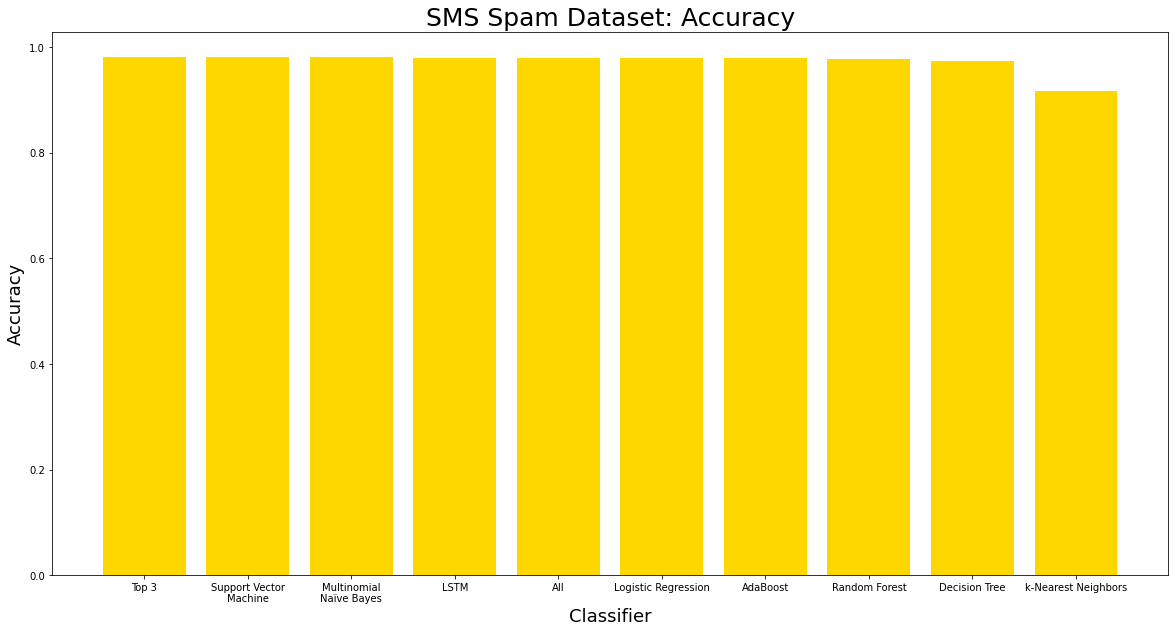

In [37]:
# Plot the accuracies.
acc_classifiers = classifiers
zipped_lists = zip(acc_list, acc_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
acc_list, acc_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(acc_classifiers, acc_list, color='gold')
plt.title('SMS Spam Dataset: Accuracy', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Accuracy', size=18)
plt.show()

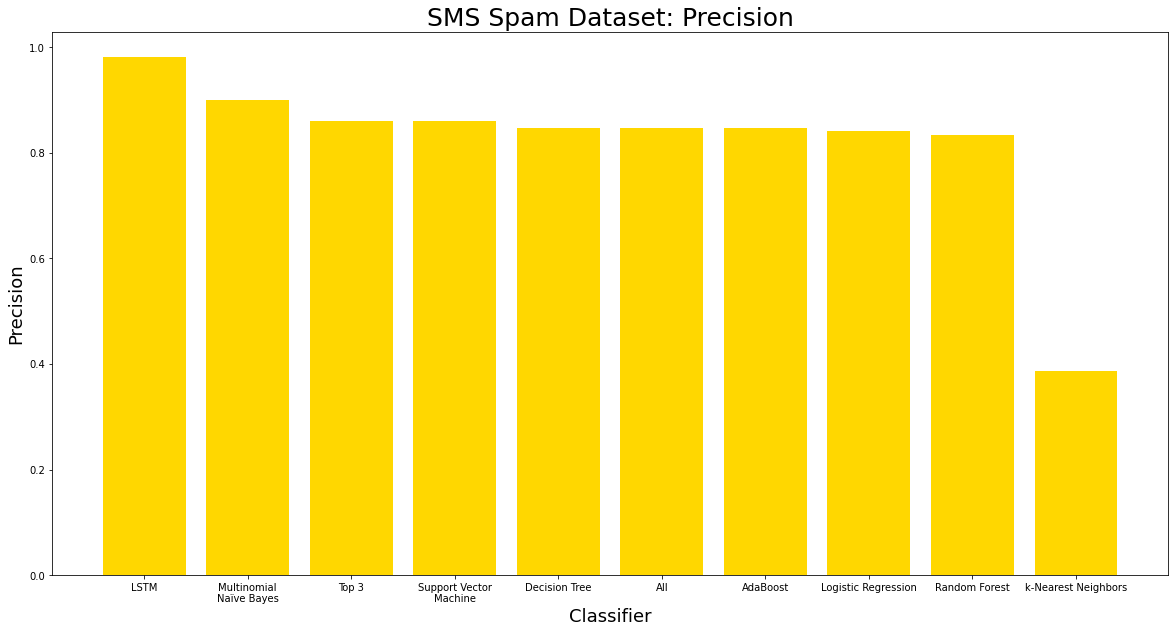

In [38]:
# Plot the precision.
p_classifiers = classifiers
zipped_lists = zip(p_list, p_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
p_list, p_classifiers = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(20, 10))
plt.bar(p_classifiers, p_list, color='gold')
plt.title('SMS Spam Dataset: Precision', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Precision', size=18)
plt.show()

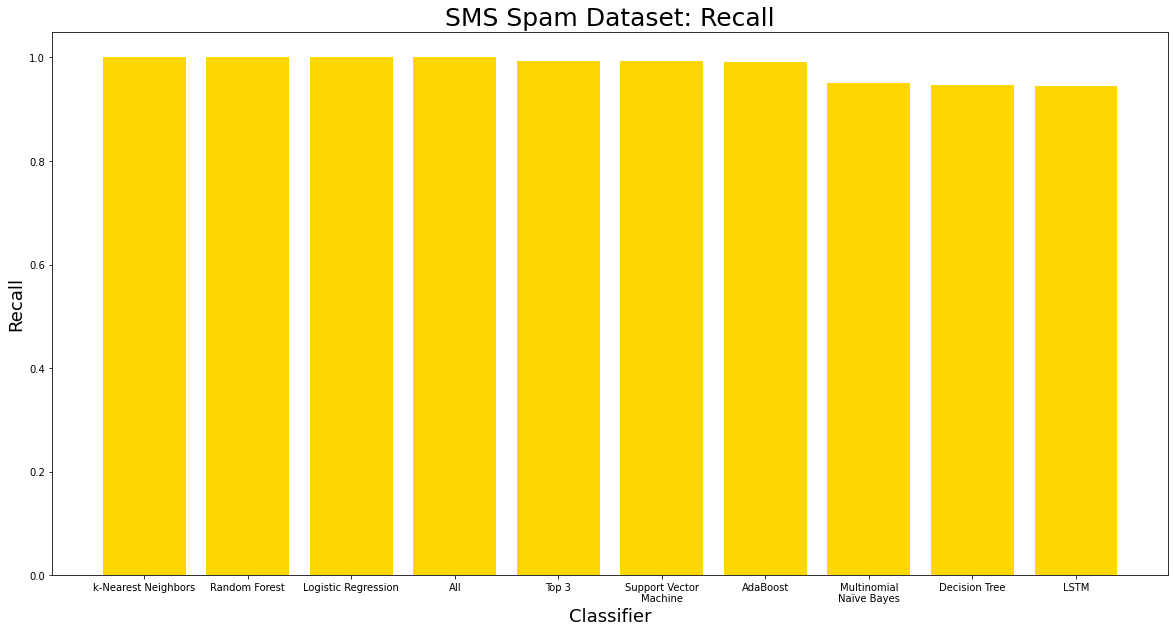

In [39]:
# Plot the recall.
r_classifiers = classifiers
zipped_lists = zip(r_list, r_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
r_list, r_classifiers = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(20, 10))
plt.bar(r_classifiers, r_list, color='gold')
plt.title('SMS Spam Dataset: Recall', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Recall', size=18)
plt.show()

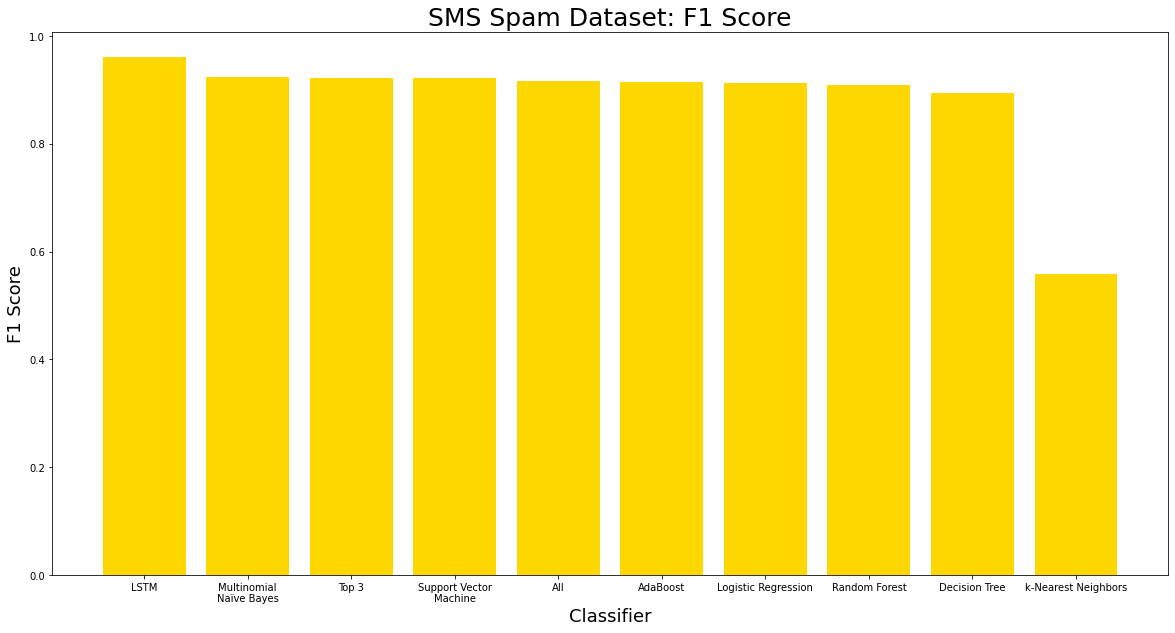

In [40]:
# Plot the F1 scores.
f1_classifiers = classifiers
zipped_lists = zip(f1_list, f1_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
f1_list, f1_classifiers = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(20, 10))
plt.bar(f1_classifiers, f1_list, color='gold')
plt.title('SMS Spam Dataset: F1 Score', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('F1 Score', size=18)
plt.show()

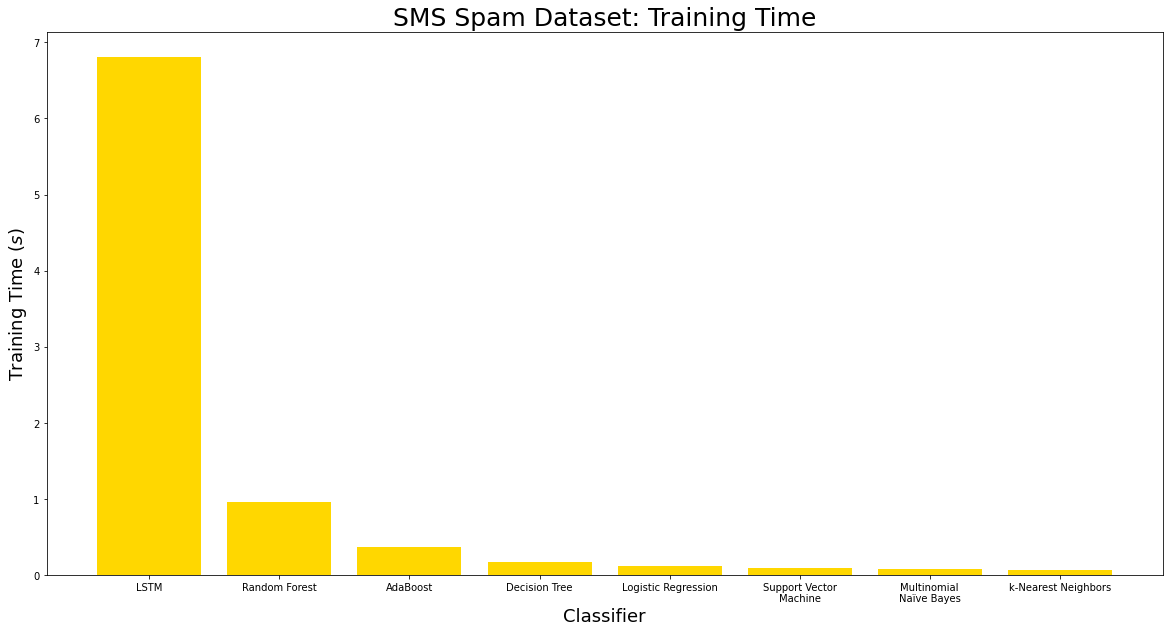

In [41]:
# Plot the training times.
train_classifiers = classifiers[:8]
zipped_lists = zip(time_train_list, train_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
time_train_list, train_classifiers = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(20, 10))
plt.bar(train_classifiers, time_train_list, color='gold')
plt.title('SMS Spam Dataset: Training Time', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Training Time ($s$)', size=18)
plt.show()

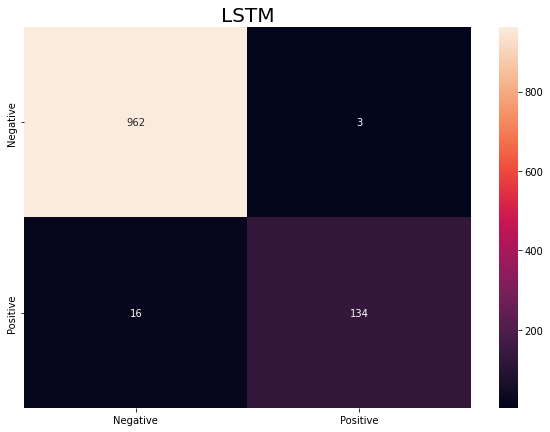

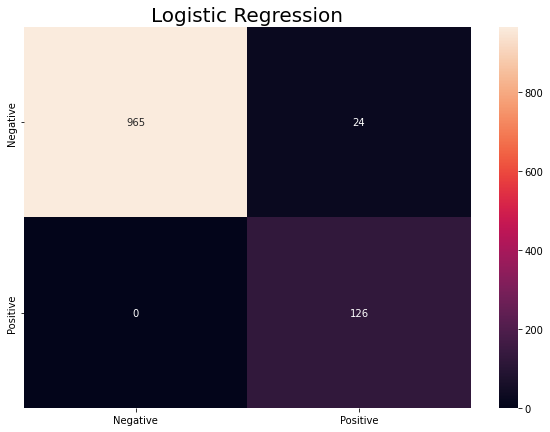

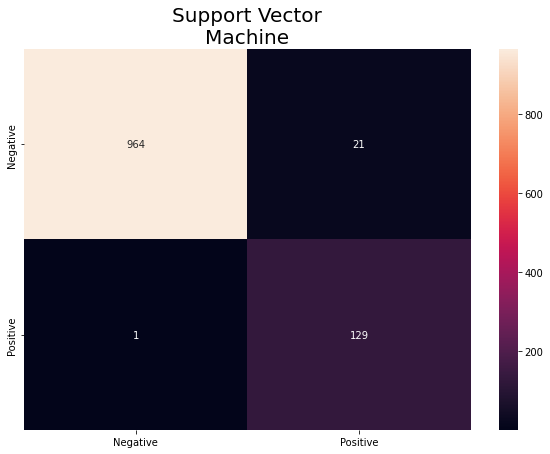

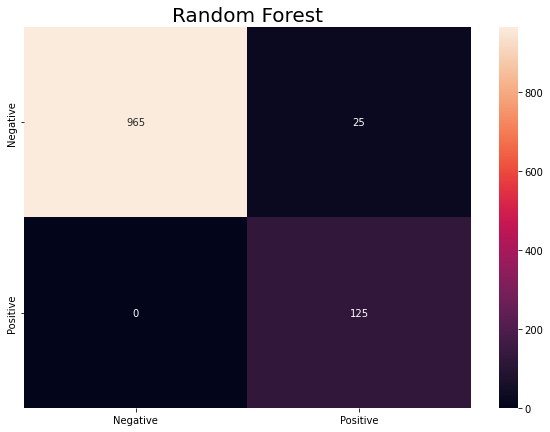

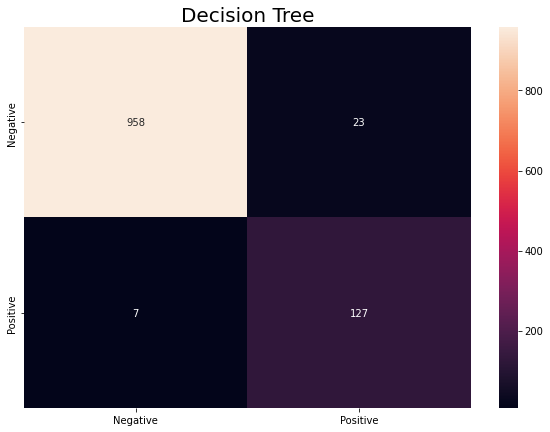

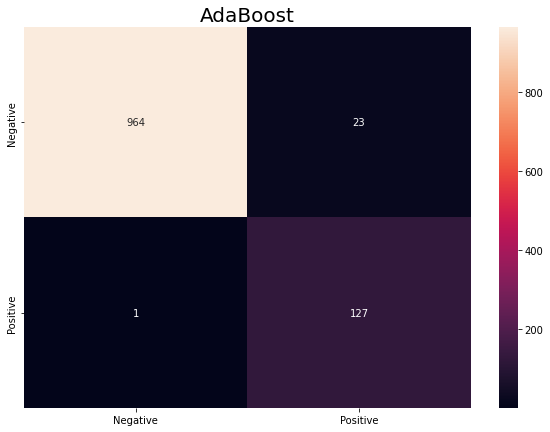

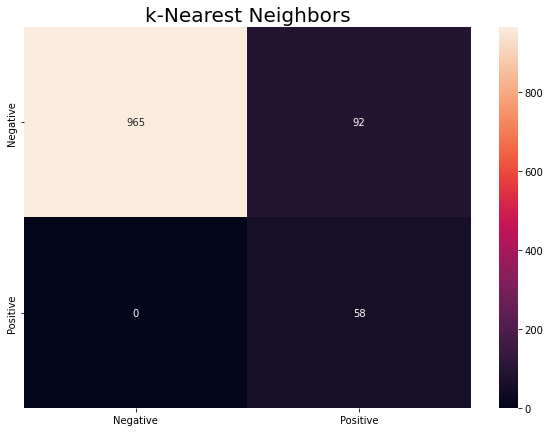

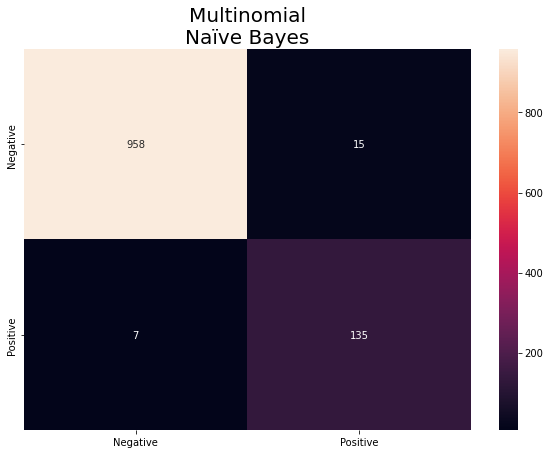

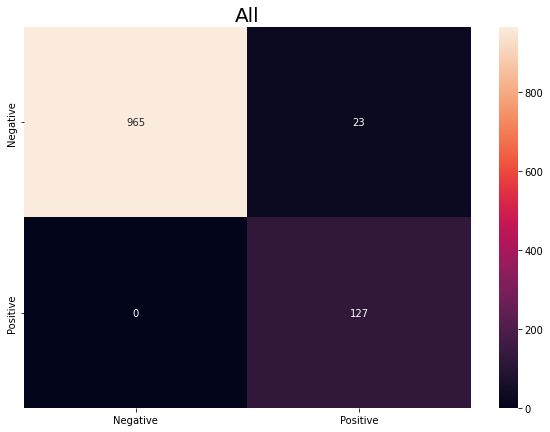

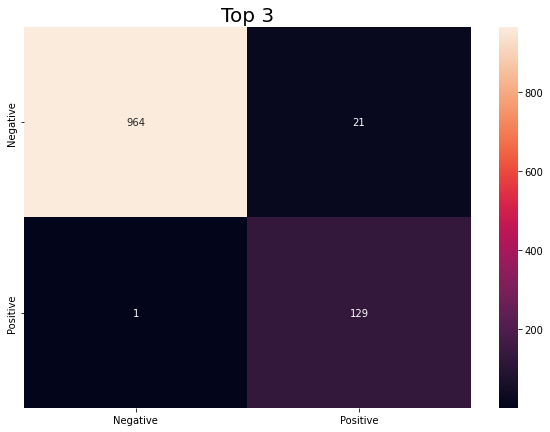

In [42]:
# Plot the confusion matrices.
for i in range(len(classifiers)):
  df_cm = pd.DataFrame(cm_list[i], index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
  plt.figure(figsize = (10,7))
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_title(classifiers[i], size=20)